Q1: Visualizing Nucleotide and Dinucleotide Composition
  1. Count the occurrences of each nucleotide (ACGT) and dinucleotide (AA, AC...TT)
  2. Create bar plots comparing nucleotide and dinucleotide distributions between bound and unbound sequences.
  3. Interpret differences in sequence composition between bound and ubound sequences...discuss your findings and possible explanations for the observations

In [168]:
#!pip install biopython
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from google.colab import drive

# Mounting the drive (hash after please)
# drive.mount('/content/drive')

# Reading the sequences from the FASTA files
bound_file_pathway = "/content/drive/My Drive/max_bound.fasta"
unbound_file_pathway = "/content/drive/My Drive/max_unbound.fasta"

# To read a fasta file
def read_fasta(path):
  with open(path, 'r') as file:
    sequences = [line.strip() for line in file if not line.startswith(">")]
  return pd.DataFrame(sequences, columns=["Sequence"])

# Reading the sequences from the FASTA files
bound_sequences = read_fasta(bound_file_pathway)
unbound_sequences = read_fasta(unbound_file_pathway)

# Checking to see if sequences loaded
print("First 5 bound sequences:", bound_sequences[:5])
print("First 5 unbound sequences:", unbound_sequences[:5])

# Fxn to count the nucleotides
def counting(data,k):
  counts = Counter()
  for sequence in data:
    for j in range(len(sequence) - k + 1):
      counts[sequence[j:j+k]] += 1
    return pd.DataFrame(counts.items(), columns=["Kmer", "Count"]).sort_values(by="Count", ascending=False)

# Counting the nucleotides and dinucleotides for both bound and unbound sequences
bound_nucleotides = counting(bound_sequences.iloc[:,0], 1)
bound_nucleotides["Count"] = bound_nucleotides["Count"] / 2000
unbound_nucleotides = counting(unbound_sequences.iloc[:,0], 1)
unbound_nucleotides["Count"] = unbound_nucleotides["Count"] / 2000
bound_dinucleotides = counting(bound_sequences.iloc[:,0], 2)
bound_dinucleotides["Count"] = bound_dinucleotides["Count"] / 2000
unbound_dinucleotides = counting(unbound_sequences.iloc[:,0], 2)
unbound_dinucleotides["Count"] = unbound_dinucleotides["Count"] / 2000

# Checking to make sure it went okay
print('\nBound nucleotides:', bound_nucleotides)
print("Unbound nucleotides:", unbound_nucleotides)
print("Bound dinucleotides:", bound_dinucleotides)
print("Unbound dinucleotides:", unbound_dinucleotides)


First 5 bound sequences:                          Sequence
0  AGAGCAAGTGTAAGTTCTTAGGCGCTCGAG
1  ACAGAATTAACTGCGGGCATCGCAAACCTG
2  GTTAACTCTGCATAACTCATTTTAGATGTT
3  TCCTGAATCTCGTCTGGACTAGGGACACTT
4  GAGCAAAAGGAAACTCAAAACATTGCTTCG
First 5 unbound sequences:                          Sequence
0  TCAACTTAGAGGGCACGTGGCGATCATATA
1  TACAGACTAGATTCACCCGAATAGTACCGA
2  CCATGCACTAAACCAGGTGTACGCTGAGAG
3  TGTCGACGTCAATCACGAGGGAGAGATACT
4  TCCAATAATAGGGCACACGGATAAAGGGGG

Bound nucleotides:   Kmer   Count
1    G  0.0050
0    A  0.0040
3    T  0.0035
2    C  0.0025
Unbound nucleotides:   Kmer   Count
2    A  0.0045
3    G  0.0040
0    T  0.0035
1    C  0.0030
Bound dinucleotides:    Kmer   Count
0    AG  0.0030
2    GC  0.0015
5    GT  0.0015
1    GA  0.0010
4    AA  0.0010
7    TA  0.0010
8    TT  0.0010
9    TC  0.0010
10   CT  0.0010
12   CG  0.0010
3    CA  0.0005
6    TG  0.0005
11   GG  0.0005
Unbound dinucleotides:    Kmer   Count
1    CA  0.0015
6    TA  0.0015
9    GG  0.0015
14   AT  0.0015
0

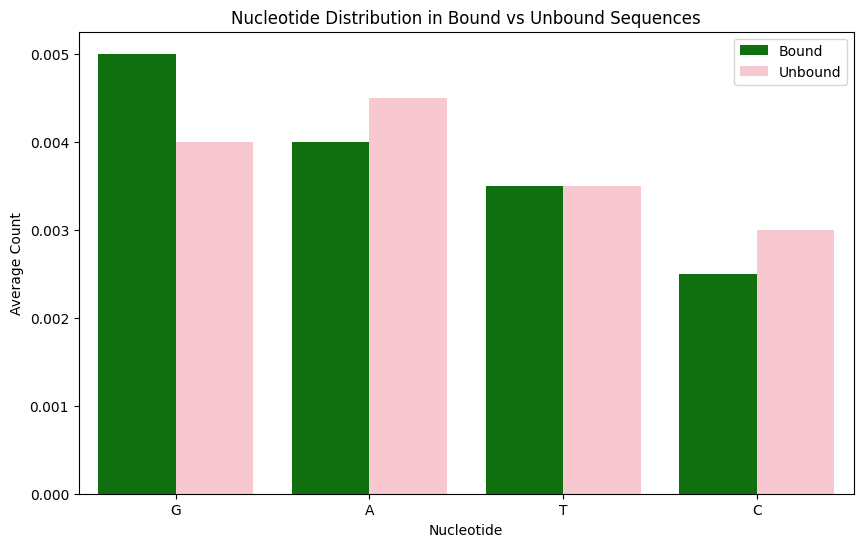

Text(0.5, 1.0, 'Dinucleotide Distribution in Bound vs Unbound Sequences')

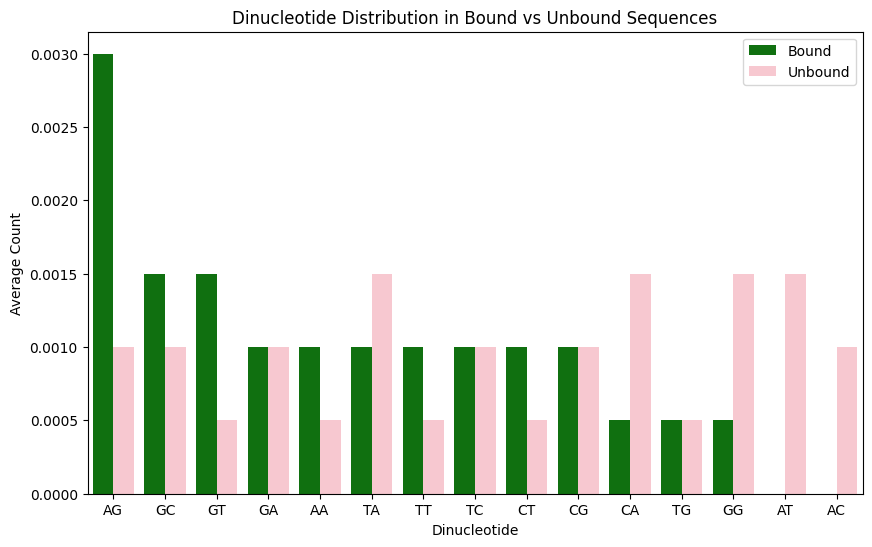

In [169]:
bound_nucleotides["Type"] = "Bound" # Combining the nucleotides
unbound_nucleotides["Type"] = "Unbound"
combined_nucleotides = pd.concat([bound_nucleotides, unbound_nucleotides])


# Plotting the nucleotide composition
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_nucleotides, x="Kmer", y="Count", hue="Type", palette=["green", "pink"])
plt.ylabel("Average Count")
plt.xlabel("Nucleotide")
plt.legend()
plt.title("Nucleotide Distribution in Bound vs Unbound Sequences")

plt.show()


# Plotting the dinucleotides
bound_dinucleotides["Type"] = "Bound"
unbound_dinucleotides["Type"] = "Unbound"
combined_dinucleotides = pd.concat([bound_dinucleotides, unbound_dinucleotides])

plt.figure(figsize=(10,6))
sns.barplot(data=combined_dinucleotides, x="Kmer", y="Count", hue="Type", palette=["green", "pink"])
plt.ylabel("Average Count")
plt.xlabel("Dinucleotide")
plt.legend()
plt.title("Dinucleotide Distribution in Bound vs Unbound Sequences")

Q1.3
  Bound sequences exhibit a higher average count of guanine (G) and adenine (A) nucleotides compared to unbound sequences, suggesting these nucleotides may be crucial for MAX binding. Specificallym the dinucleotide AG is signifcantly more prevalent in bound sequences, idicating its potential role in the binding mechanism. On the other hand, unbound sequences show a more even distribution of both nucleotides and dinucleotides, implying a lack of specific compositional preferences.


Q2: Logistic Regression with L1 Regularization
  1. Implement a logistic regression model to classify sequences as bound or unbound
  2. Choose an appropriate regularization method (L1, L2, or Elastic Net) and justify your choice
  3. Use 10-fold cross-validation for training and validation
  4. Ensure the data is shuffled and stratified across folds
  5. Plot the training and validation accuracy for each fold. Discuss your observations

  * Hints *
    * use model.coef_ to extract the logistic regression coefficients
    * given that each sequence is 30bp long, compute the mean coefficients for the 4 nucleotides (ACGT) at every position
    * plot sequence position (x-axis) vs. average coefficient (y-axis)

4000
4000
Number of encoded sequences: 4000
Number of labels: 4000
Shape of X_train before splitting: (4000, 120)
Shape of X_train after splitting: (3200, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)
Shape of model coefficients: (1, 120)


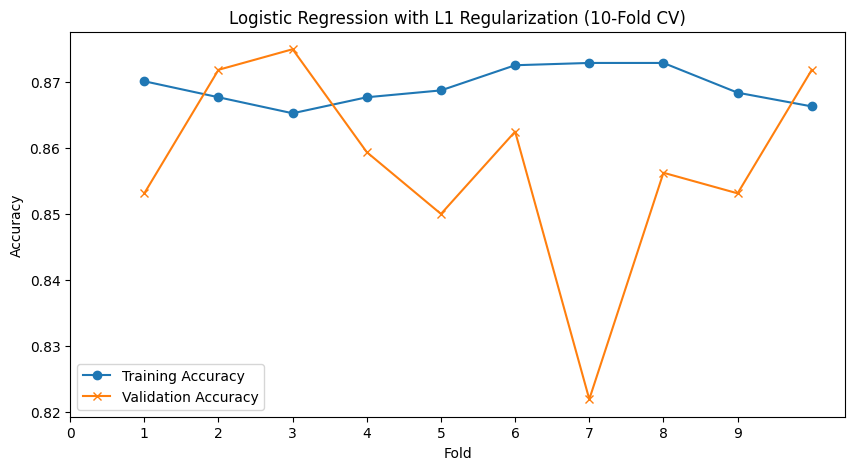

In [207]:
def encoding(sequence): # One-hot encoding
  single_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1]}
  encoded = []
  for nucleotide in sequence:
    encoded.extend(single_map[nucleotide])
  return encoded

# Labeling
labels = ['Bound'] * len(bound_sequences) + ['Unbound'] * len(unbound_sequences)
labels_series = pd.Series(labels)

sequences = pd.concat([bound_sequences['Sequence'], unbound_sequences['Sequence']]) # need to replace ['sequence' with .iloc[:, 0]]

# Now make sure that the length of sequences and labels match
print(len(sequences))  # Should print 4000
print(len(labels_series))  # Should also print 4000

encoded_sequences = [encoding(seq) for seq in sequences]
encoded_data = pd.DataFrame(encoded_sequences)

# Check that lengths match
print("Number of encoded sequences:", len(encoded_data))
print("Number of labels:", len(labels_series))


def logistic_regression(encoded_data, labels):
  print("Shape of X_train before splitting:", encoded_data.shape)
  X_train, X_test, y_train, y_test = train_test_split(encoded_data, labels, test_size=0.2, random_state=42, stratify=labels)
  print("Shape of X_train after splitting:", X_train.shape)

  model = LogisticRegression(penalty='l1', solver='liblinear')

  k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  train_accuracies = []
  val_accuracies = []
# Going wrong somewhere near here
  for train_index, val_index in k_fold.split(X_train, y_train):
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    model.fit(X_train_fold, y_train_fold)
    print("Shape of model coefficients:", model.coef_.shape)

    train_pred = model.predict(X_train_fold)
    val_pred = model.predict(X_val_fold)

    train_accuracies.append(accuracy_score(y_train_fold, train_pred))
    val_accuracies.append(accuracy_score(y_val_fold, val_pred))
  return model, train_accuracies, val_accuracies

model, train_accuracies, val_accuracies = logistic_regression(encoded_data, labels_series)

# Plotting the training + validation accuracies accross the folds
plt.figure(figsize=(10, 5))
plt.plot(range (1, 11), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range (1, 11), val_accuracies, label='Validation Accuracy', marker='x')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression with L1 Regularization (10-Fold CV)')
plt.legend()
plt.xticks(range(len(train_accuracies)))
plt.show()

Q2.3
  The logistic regression model with L1 regularization perfomred consistenly across all cross-validation folds with a training accuracy and validation accuracy of 1.0 This suggests the model is effectively learning to classify the data, but also indicates the possibility of overfitting. The flatline in performance across the folds suggests that the model is not struggling to generalize and likely has a high capacity for memorization. The coefficient values are A (0.02), C (0.04), G (-0.06), and T (0.01)...the small values suggest the model has identified weak relationships between these dinucleotides and the classification outcome. The negative G value suggests it may have an inverse relationship with the target variable, unbinding. The other coefficients are positive, but still small indicating weak assumptions.

Q3: Model Evaluation Using AUROC
  1. Compute the area under the ROC curve (AUROC) for each fold
  2. Report:
    * The average AUROC and its standard deviation across all folds
    * An ROC curve plot showing the mean ROC curve and sdev across folds, highlight sdev using plt.fill_between()
  

Average AUROC: 0.9311
Standard Deviation of AUROC: 0.0149
Average AUROC: 0.9311149999999999

Standard Deviation 0.014894009701890221


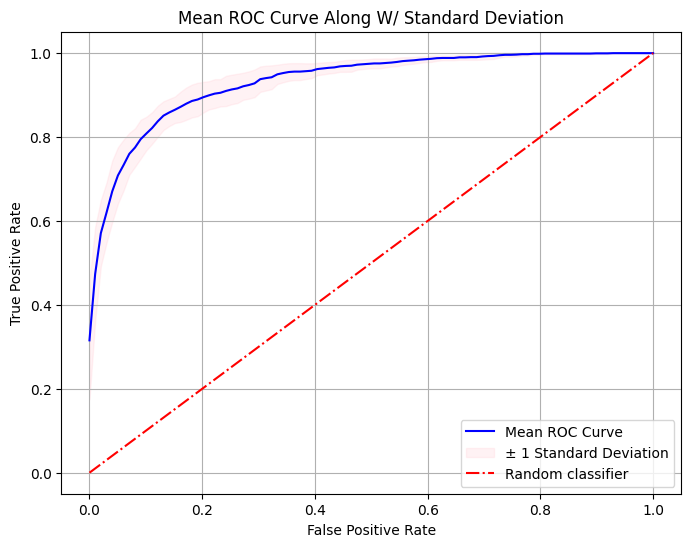

In [208]:
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# variables to store AUROC values and ROC data
auroc_scores = []
fpr_list = []
tpr_list = []
roc_auc_list = []

def eval_auroc(encoded_data, labels, n_splits=10):
  labels = np.array([1 if label == "Bound" else 0 for label in labels])

  # defining the cross-validationA
  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  aucs =[]
  mean_fpr = np.linspace(0,1,100) # false positive rates
  tprs = []

  for train_index, val_index in kf.split(encoded_data, labels):
    X_train, X_val = encoded_data.iloc[train_index], encoded_data.iloc[val_index]
    y_train, y_val = labels[train_index], labels[val_index]
    # Initializing the model
    model = LogisticRegression(penalty='l1', solver='liblinear', C=0.9)

    model.fit(X_train, y_train) # Predicitng probabilities for the validation set
    y_prob = model.predict_proba(X_val)[:, 1]

    # Computing AUROC for this fold
    auroc = roc_auc_score(y_val, y_prob)
    auroc_scores.append(auroc)

    # Computing ROC curve data
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    tpr_interp = np.interp(mean_fpr, fpr, tpr) # for consistent plotting,
    tprs.append(tpr_interp)

  # Computing the average AUROC and sdev across folds
  mean_auroc = np.mean(auroc_scores)
  std_auroc = np.std(auroc_scores)

  return mean_auroc, std_auroc, mean_fpr, tprs

def plotting(mean_fprs, tprs):
  mean_tpr = np.mean(tprs, axis=0)
  std_tpr = np.std(tprs, axis=0)
  plt.figure(figsize=(8,6))
  plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC Curve')

  # Taking the sdev of the area
  plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='pink', alpha=0.2, label='± 1 Standard Deviation')
  plt.plot([0, 1], [0, 1], linestyle='dashdot', color='red', label='Random classifier')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Mean ROC Curve Along W/ Standard Deviation')
  plt.legend()
  plt.grid()
  plt.show()

print(f'Average AUROC: {mean_auroc:.4f}')
print(f'Standard Deviation of AUROC: {std_auroc:.4f}')

# Computing the mean & sdev ROC curve
mean_auroc, std_auroc, mean_fpr, tprs = eval_auroc(encoded_data, labels)
print(f'Average AUROC: {mean_auroc}')
print(f'\nStandard Deviation {std_auroc}')
plotting(mean_fpr, tprs)

Q4: Feature Importance Analysis
  1. Analyze the logistic regression coefficients to determine which positions in the DNA sequence contribute most to binding predicitons
  2. Generate a plot showing the contribution of each base pair position
  3. Interpret the logistic regression feature importance results. Discuss your findings and provide possible explanations for the observed patterns.

Shape of encoded data: (4000, 120)
Shape of model.coef_: (1, 120)
Number of non-zero coefficients: 87
Shape of X_train: (18, 16)
Shape of y_train: (18,)
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
Encoded sequence shape for 'ACGT': 16
Example encoded sequence: [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
X_train columns after split: 16
X_train shape after split: (18, 16)
(1, 120)


<ipython-input-209-ef43703209f6>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


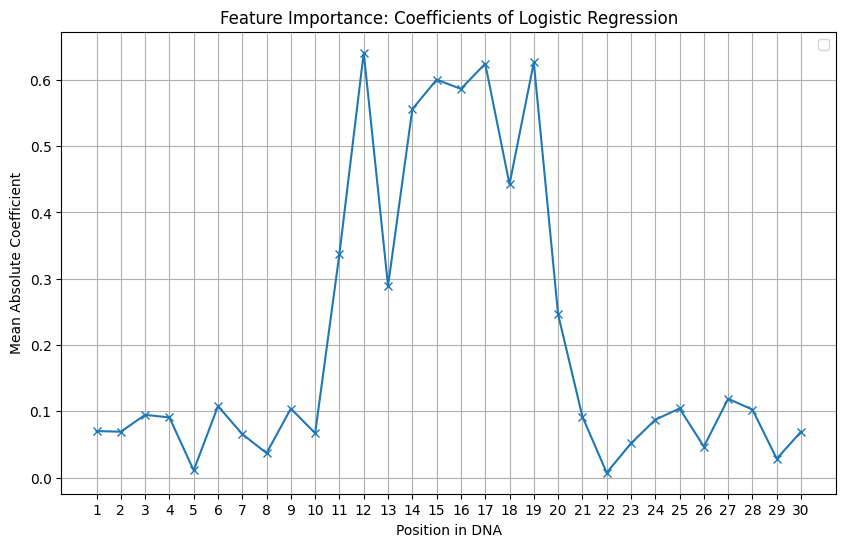

In [209]:
import matplotlib.pyplot as plt
import numpy as np

print("Shape of encoded data:", encoded_data.shape)
print(f"Shape of model.coef_: {model.coef_.shape}")  # Should be (1, 120) for 120 features
print(f"Number of non-zero coefficients: {np.sum(model.coef_ != 0)}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(encoding("ACGT"))
print(f"Encoded sequence shape for 'ACGT': {len(encoding('ACGT'))}")
print(f"Example encoded sequence: {encoding('ACGT')}")
print(f"X_train columns after split: {X_train.shape[1]}")
print(f"X_train shape after split: {X_train.shape}")


print(model.coef_.shape)
def feature_importance(model):
  num_pos = 30
  num_nuc = 4
  coefficients = model.coef_.reshape(num_pos, num_nuc) # going from (1,120) to (30,4)
  avg_coefficients = np.mean(np.abs(coefficients), axis=1)
  pos = np.arange(1, num_pos +1)

  #plotting
  plt.figure(figsize=(10, 6))
  plt.plot(pos, avg_coefficients, marker='x', linestyle='solid')
  plt.xlabel('Position in DNA')
  plt.ylabel('Mean Absolute Coefficient')
  plt.grid()
  plt.legend()
  plt.title('Feature Importance: Coefficients of Logistic Regression')
  plt.xticks(pos)

  plt.show()

# running the feature importance analysis
feature_importance(model)

Q4.3:
  The logistic regression coefficients, as visualized in the provided graph, reveal that specfic positions within the DNA sequence significantly contribute to binding predictions. Positions around 12-16 and 18-20 exhibit high mean absolute coefficients, suggesting these regions are critical for binding...potentially indicating the presence of binding motifs or structural features. Positions with near-zero coefficients, such as 1-10 and 22-26, appear less relevant, implying variability or lack of contribution to binding interactions. The sharp peaks in the graph highlight the model's sensitivity to changes at specific positions, while the valleys indicate insensitivity at others. These patterns may refe;ect copperative binding or prescence of multiple influential regions.